*Alors je te préviens, il ne s'agit pas d'un document scientifique pur et dur, mais plutôt d'une évasion personnelle, donc toutes mes excuses pour le langage familier. Je suis par contre ouvert à toute remarque et critique constructive. Merci et agréable lecture, j'espère que les prochaines minutes te seront profitables !*

Déjà, comment est-ce que j'en arrive là ?

Je travaillais avec une camarade sur un devoir de Supply Chain Management, et l'un des exercices parlait d'une compagnie produisant des jus de fruits. Initialement basée à Bruxelles, elle projetait de s'étendre dans 3 nouvelles villes européennes : Strasbourg, Zurich & Berlin.

L'idée m'est donc venue de faire une illustration simple présentant les 4 villes concernées. J'ai ensuite conçu ce notebook question d'expliquer un peu le procédé de réalisation de ladite illustration. Partant de mon devoir d'école on va dire que c'est un peu allé dans tous les sens, mais je suis convaincu qu'il y'a pas mal de choses intéressantes là-dedans et que ce contenu pourra aider beaucoup de personnes à **comprendre ce que c'est qu'une image pour un ordinateur**.

L'image traitée dans ce mini-projet, j'ai pu la designer (colorier) et la télécharger (capturer l'écran) depuis ce site web : [https://philarcher.org/diary/2013/euromap/](https://philarcher.org/diary/2013/euromap/).

Let's then tumble down the rabbit hole! (Rentrons dans le vif du sujet !)

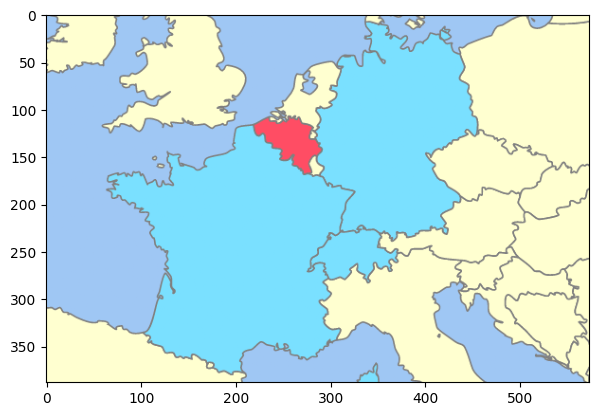

In [1]:
 # Importons et visualisons l'image
import matplotlib.pyplot as plt
image = plt.imread('map.png')
plt.figure(figsize=(7, 5))
plt.imshow(image)
plt.show()

In [2]:
# Tout part de l'analyse des dimensions d'une image...
image.shape

(388, 573, 4)

Du point de vue d'un ordinateur, une image **PEUT** être représentée sous la forme d'un tableau à 3 dimensions, les deux premières représentant la taille, et la troisième les couleurs ; on parle alors d'**image matricielle**.

La taille d'une image n'est rien d'autre que son nombre de pixels en hauteur (heigth) et en largeur (width), respectivement **388** et **573** dans notre cas. Le **pixel (px)** est l'élément de base d'une image, il correspond à l'intersection d'une "ligne" et d'une "colonne", et renferme les informations relatives à la **couleur**. C'est en effet le fait de "ranger" les pixels les uns après les autres, puis en dessous des autres, qui permet d'avoir une image complète.

Ainsi, une image sera d'autant plus précise qu'elle possèdera de pixels, puisqu'elle pourra alors être décomposée en davantage d'unités élémentaires pouvant porter chacune une couleur différente. C'est la raison pour laquelle lorsque l'on observe une image de mauvaise qualité, des petits carrés sont visibles : il n'y a tellement pas assez de pixels que nous sommes capables de les distinguer. Le phénomène similaire s'observe lorsqu'une image est "zoomée" ; la perte de qualité est ici due au fait que la surface ou l'écran servant initialement à représenter l'image entière, est la même devant cette fois servir à représenter une zone précise de la même image, soit par exemple `20 x 20` pixels (ou petits carrés) pour un zoom de `500%` sur une image initiale de dimensions `100 x 100`.

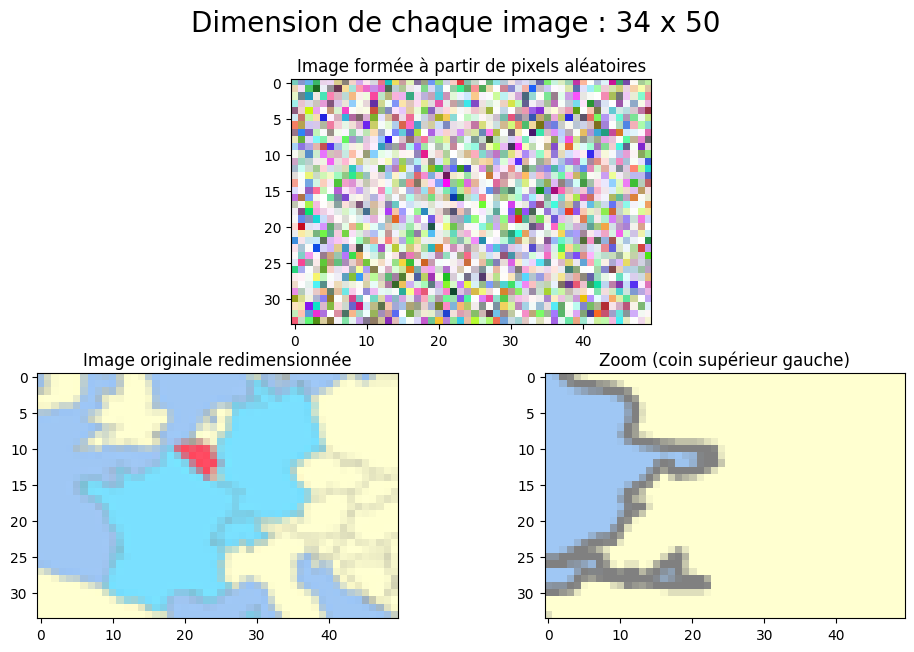

In [3]:
import numpy as np
from PIL import Image

fig = plt.figure(figsize=(12, 7))
spec = fig.add_gridspec(2, 2)

random_image = np.random.rand(34, 50, 4)
ax0 = fig.add_subplot(spec[0, :])
ax0.imshow(random_image)
ax0.set_title('Image formée à partir de pixels aléatoires')

resized_map = Image.open('map.png').resize((50, 34))
ax10 = fig.add_subplot(spec[1, 0])
ax10.imshow(resized_map)
ax10.set_title('Image originale redimensionnée')

zoomed_map = image[:34, :50, :]
ax11 = fig.add_subplot(spec[1, 1])
ax11.imshow(zoomed_map)
ax11.set_title('Zoom (coin supérieur gauche)')

fig.suptitle('Dimension de chaque image : 34 x 50', fontsize=20)
plt.show()

**Note** : Contradiction de tout ce que je viens de dire.

(Contradiction totale c'est un peu extrême quand même mais) Ce qu'il faut savoir c'est que :

- Il existe des méthodes (comme l'[interpolation](https://www.toile-impression.fr/faq/preparation-des-fichiers-pour-impression/qu-est-ce-que-l-interpolation.php)) permettant de minimiser la perte de qualité lors d'un zoom sur une image.
- Le [format d'une l'image](https://www.techsmith.fr/blog/jpg-png) (.jpg, .png, ...) influence aussi son aptitude à conserver ses proprietés lors de diverses opérations
- Les images numériques ne sont pas toutes matricielles, il en existe aussi des [vectorielles](https://edutechwiki.unige.ch/fr/Image_vectorielle), conçues comme étant une combinaison d'objets géométriques individuels possédant divers attributs (forme, position, taille, couleur, ...). Cette représentation très souvent utilisée en **cartographie**, permet d'agrandir à l'infini sans perte de qualité, mais ne saurait malheureusement reproduire à la perfection une image photographique tirée du monde naturel, puisqu'elle se base sur des formules mathématiques pour représenter les objets (deux sommets opposés pour un rectangle, centre et rayon pour un cercle, équations de droites, ...)


**Note** : Repérage des points (pixels) sur une image.

Il existe **deux différences majeures** entre :

- la lecture des coordonnées d'un point dans un repère orthogonal du plan et
- l'identification d'une donnée dans un dataset rectangulaire, i.e. sous le format *lignes / colonnes* ou encore *individus / attributs*,

et pourtant nous avons des raisons de penser qu'il s'agit d'opérations identiques : deux axes orthogonaux à disposition, et des points répartis dans cet univers, et deux nombres associés à chaque point permettant de l'identifier de manière unique...

```
Dans un repère classique, le premier axe est horizontal et orienté vers la droite,
tandis que le second, orienté vers le haut, est vertical.

Quand par contre il faut lire une table de données rectangulaire sur Python, nous
identifions une donnée par son numéro de ligne d'abord (axe vertical), puis par
son numéro de colonne (axe horizontal), avec cette précision que l'axe vertical
est orienté vers le bas : on lit 1 en dessous de 0, 2 en dessous de 1, ...

Donc deux différences :
- l'ordre de lecture sur les axes ;
- l'orientation de l'axe vertical.
```

J'ai jugé nécessaire d'apporter ces précisions pour ensuite (donc maintenant) faire remarquer que les images obéissent au second principe de repérage (cf. les axes des images ci-dessus).

En espérant que ce court (long) exposé sur la taille d'une image vous a été utile, allons donc découvrir ce qui se cache derrière la troisième composante.

La **troisième dimension** d'une image matricielle définit ses **couleurs**. Chaque intersection d'une ligne et d'une colonne possède une couleur qui peut être définie par :

- une **valeur unique** pour les images en noir sur blanc : 0 pour le noir, valeurs appartenant à (0, 1) pour les nuances de gris, et 1 pour le blanc ;

- une liste de **3 nombres** représentant respectivement l'intensité de rouge `Red`, de vert `Green`, et de bleu `Blue` : c'est le système **RGB**, qui permet de définir une "infinité de couleurs", (fin plus de 16 millions : `256 x 256 x 256 = 16 777 216`), à partir de ces 3 coulorations de base, dont l'intensité a le droit de varier entre 0 (sombre) et 255 (clarté maximale) ;

- une liste de **4 nombres**, c'est le système **RGBa**, avec a pour alpha, la transparence ou opacité de la couleur, variant de 0 (invisible) à 1.

**Note** : RGB normalisé

Sur Python, les valeurs RGB sont parfois normalisées, c'est-à-dire qu'elles varient de 0 à 1 au lieu de 0 à 255.

Par exemple, la couleur (26, 102, 230) définissant une nuance de bleu s'écrit (0.1, 0.4, 0.9).

On a en effet : $26~/~255 \approx 0.1,\quad 102~/~255 = 0.4\quad et\quad 230~/~255 \approx 0.9$,

Donc pour résumer, voici comment tu peux te représenter une image numérique :

- Penses à une peintre (pour le coup super talentueuse) devant créer l'image ci-dessus.
- Elle dispose de trois géants tableaux **transparents** (n'oublie pas que même la couleur blanche est en fait une combinaison de 255 red, 255 green, et 255 blue).
- Chacun de ces tableaux correspond à une couleur de base et est muni d'un quadrillage de taille `388 x 573`.
- Elle dispose en outre de son pinceau (évidemment) et d'un set plus que complet comprenant `256 x 3`, soit `768` gouaches différentes (intensités de rouge, de vert et de bleu mesurées de 0 à 255).
- Bien sûr, elle aura sûrement besoin d'un échaffaudage pour grimper... et éventuellement d'une armée d'assistant.e.s pour l'aider à peindre les `388 x 573 x 3`, soit `666 972` cellules, sachant que nous sommes super loin d'avoir l'image la plus nette qui soit...

En bref, l'idée ici est de peindre chaque case de chaque tableau avec la nuance de la couleur concernée, afin d'obtenir 3 tableaux : 1 rouge, 1 vert et 1 bleu qu'il suffira de "superposer" pour d'obternir l'image définitive.

Pour certaines images, comme dans notre cas d'ailleurs, il sera nécessaire de repasser au peigne fin chacune des cases du tableau semi-fini afin d'en définir la "transparence" sur une échelle de 0 à 1 (**Alpha : le $4^e$ Argument** - super titre de film apocalytpique by the way).

La série de figures qui suit résume le précédent babillage.

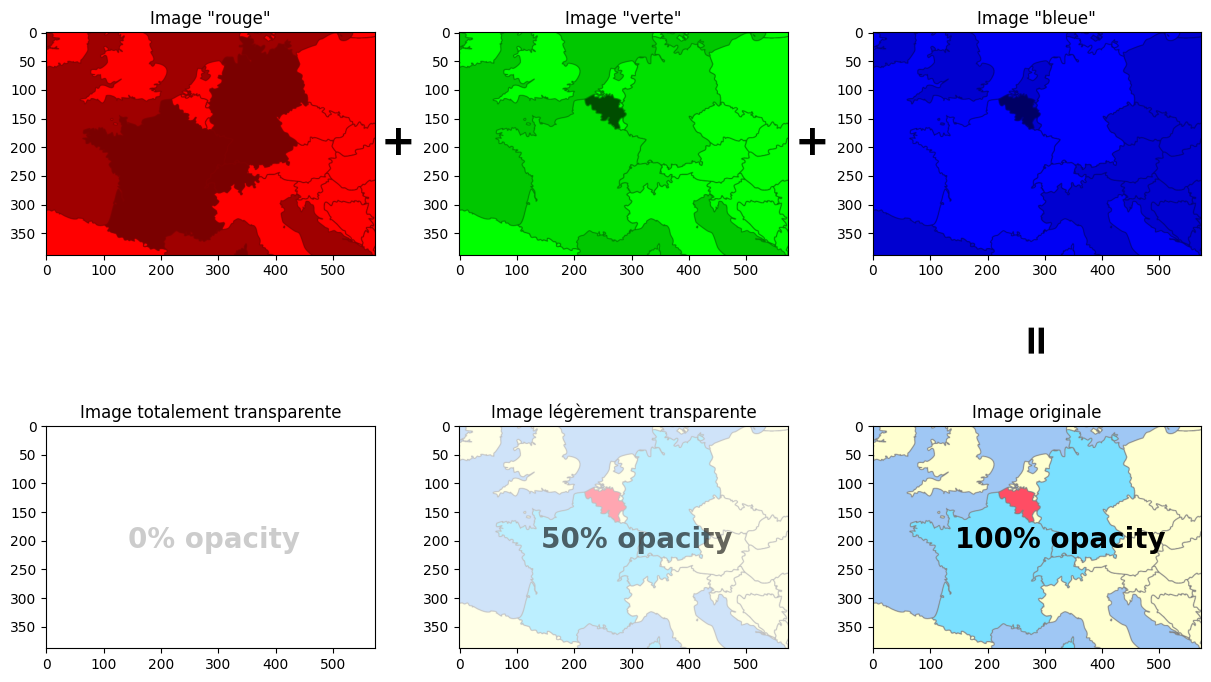

In [4]:
# Pour extraire une composante de notre image, nous remplaçons tout simplement
# toutes les lignes et toutes les colonnes des autres composantes par 0 en
# gardant la couche d'opacité intacte

fig, ax = plt.subplots(2, 3, figsize=(15, 8))
fig.subplots_adjust(hspace=.77, wspace=0.23)

zero = np.zeros((388, 573, 2))

# Rouge
red_map = image.copy()
red_map[:, :, [1, 2]] = zero # Rouge = 0e couche de la dimension 3,
                             # donc autres couches (1 et 2) = 0
ax[0, 0].imshow(red_map)
ax[0, 0].set_title('Image "rouge"')

# Vert
green_map = image.copy()
green_map[:, :, [0, 2]] = zero # Vert = 1ère couche de la dimension 3,
                               # donc autres couches (0 et 2) = 0
ax[0, 1].imshow(green_map)
ax[0, 1].set_title('Image "verte"')

# Bleu
blue_map = image.copy()
blue_map[:, :, [0, 1]] = zero # Bleu = 2e couche de la dimension 3,
                              # donc autres couches (0 et 1) = 0
ax[0, 2].imshow(blue_map)
ax[0, 2].set_title('Image "bleue"')

# Toutes les valeurs à 0 : image totalement transparente
clear_image = np.zeros((388, 573, 4))
ax[1, 0].imshow(clear_image)
ax[1, 0].set_title('Image totalement transparente')

RGB_map = clear_image.copy()               # image transparente +
RGB_map[:, :, 0] = red_map[:, :, 0]        # image rouge +
RGB_map[:, :, 1] = green_map[:, :, 1]      # image verte +
RGB_map[:, :, 2] = blue_map[:, :, 2]       # image bleue +
RGB_map[:, :, 3] = np.full((388, 573), .5) # 50% d'opacité = image originale
ax[1, 1].imshow(RGB_map)                   # légèrement transparente
ax[1, 1].set_title('Image légèrement transparente')

RGB_map[:, :, 3] = np.ones((388, 573))     # 100% d'opacité = image originale
ax[1, 2].imshow(RGB_map)
ax[1, 2].set_title('Image originale')

# Texte indicatif
s = 30 ; w = 'bold'

ax[0, 0].text(1.02, .45, '+', transform=ax[0, 0].transAxes, size=s, weight=w)
ax[0, 1].text(1.02, .45, '+', transform=ax[0, 1].transAxes, size=s, weight=w)
ax[0, 2].text(.43, -0.4, '=', transform=ax[0, 2].transAxes, size=s, weight=w,
              rotation=90)

s = 20
ax[1, 0].text(.25, .45, '0% opacity', transform=ax[1, 0].transAxes,
              size=s, weight=w, alpha=.2)
ax[1, 1].text(.25, .45, '50% opacity', transform=ax[1, 1].transAxes,
              size=s, weight=w, alpha=.6)
ax[1, 2].text(.25, .45, '100% opacity', transform=ax[1, 2].transAxes,
              size=s, weight=w, alpha=1)

plt.show()

Identification du pixel de coordonées `(x = 210, y = 180)`, je te laisse déviner la ville pointée.

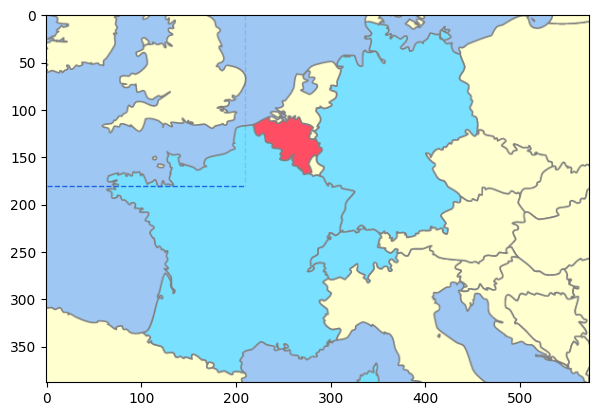

In [5]:
# Illustration : Identification du pixel de coordonées (x = 210, y = 180)
# (C'est quoi la ville pointée ?)

plt.figure(figsize=(7, 5))
plt.imshow(image)

# Ligne horizontale (y = 180)
x = [0, 210] ; y = [180, 180]
plt.plot(x, y, linestyle='--', color=(.1, .4, .9, 1), linewidth=1)

# Ligne verticale (x = 210)
x = [210, 210] ; y = [0, 180]
plt.plot(x, y, linestyle='--', color=(.1, .4, .9, .2), linewidth=1)
# Même couleur mais aspect différent ; alpha = 0.2,
# la ligne verticale passe presque inaperçu

# Remarque que la fonction plt.plot avec laquelle nous traçons les lignes
# prend comme arguments l'intervalle de variation suivant l'axe des ABSCISSES
# D'ABORD, puis suivant l'axe des ordonnées, contrairement à la méthode
# d'indexation décrite précédemment.

plt.show()

Si tout ça est bien compris, tu ne devrais avoir aucun problème avec ce qui va suivre :

- Je vais tout d'abord identifier mes quatre villes cible, non pas par des pixels uniques (ce ne serait pas du tout visible), mais grâce à un ensemble de pixels contigus en largeur et en hauteur afin d'obtenir des carrés.
- Je vais par la suite "repeindre" mes carrés afin de marquer les villes concernées.

Il s'agira juste, pour chacun des pixels sélectionnés, de lui dire voilà tu ne seras plus colorié en bleu ciel ou en jaune crème, mais plutôt en bleu celtique par exemple, en remplaçant les quatre valeurs définissant sa couleur (troisième dimension de notre matrice) par les valeurs que j'aurai choisi et qui correspondent à la nouvelle couleur.

Commençons par représenter la ville de **Bruxelles**, théâtre de nos activités florissantes ! Sur notre carte, ses coordonnées sont visiblement dans l'intervalle \[250, 280\] pour x, et \[120, 150\] pour y. Sur la base de ces intervalles, nous allons à tâtons trouver le bon carré de côté `10px` et bien entendu, cette étape sera ignorée ici...

In [6]:
celtic_blue = [.1, .4, .9,  1]
image[125:135, 250:260, :] = celtic_blue
# Une fois de plus, les lignes avant les colonnes !

En français facile, ce bout de code signifie : vas dans l'image et sélectionne les pixels des `lignes 125 à 134` ET des `colonnes 250 à 259`, et remplace les intensités actuelles de rouge, de vert, et de bleu respectivement par `10%`, `40%`, et `90%` (de 255), puis donne à ces pixels une opacité maximale `(alpha = 1)`.

Voyons donc voir comment notre peintre s'est comportée vis-à-vis des instructions qui lui ont été transmises (de toute façons c'est un ordinateur, elle ne fait que ce qu'on lui demande de faire).

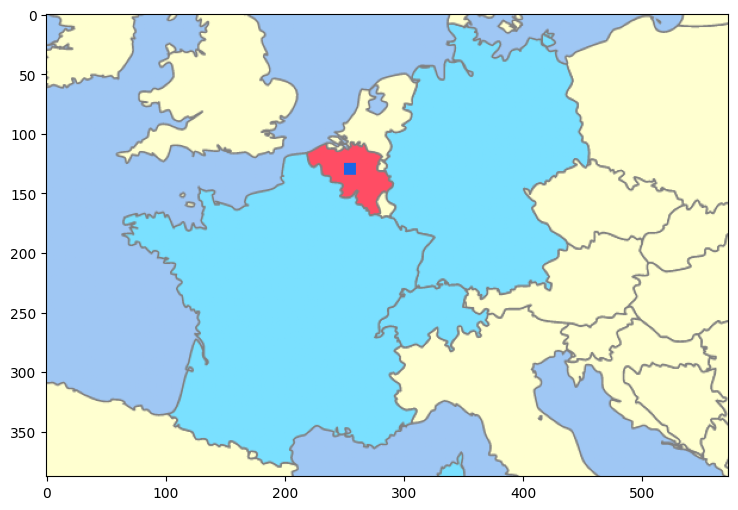

In [7]:
plt.figure(figsize=(9, 6))
plt.imshow(image)
plt.show()

Voilà qui est fait ! La capitale belge est désormais visible sur notre carte ! Représentons les autres villes à l'aide de carrés plus petits (en sélectionnant moins de pixels, `6 x 6` instead of `10 x 10`).

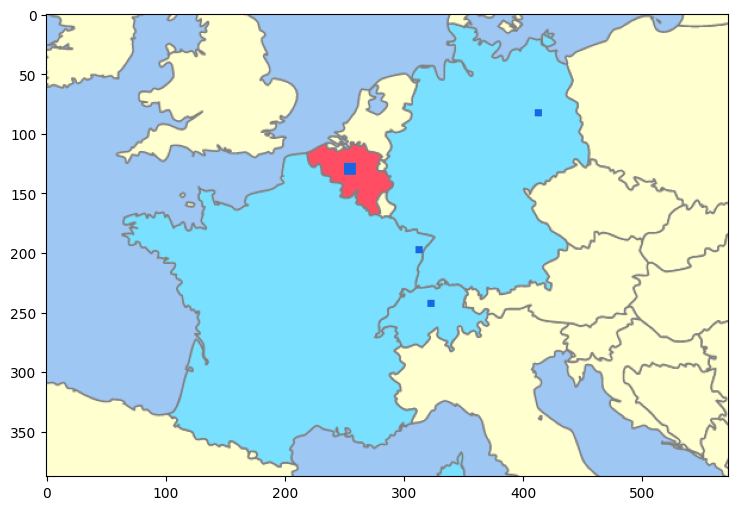

In [8]:
image[195:201, 310:316, :] = celtic_blue # Strasbourg
image[240:246, 320:326, :] = celtic_blue # Zurich
image[80:86  , 410:416, :] = celtic_blue # Berlin

plt.figure(figsize=(9, 6))
plt.imshow(image)
plt.show()

Relions ensuite le QG aux autres villes, et enfin rajoutons du texte pour davantage rentrer dans le contexte de mon devoir !

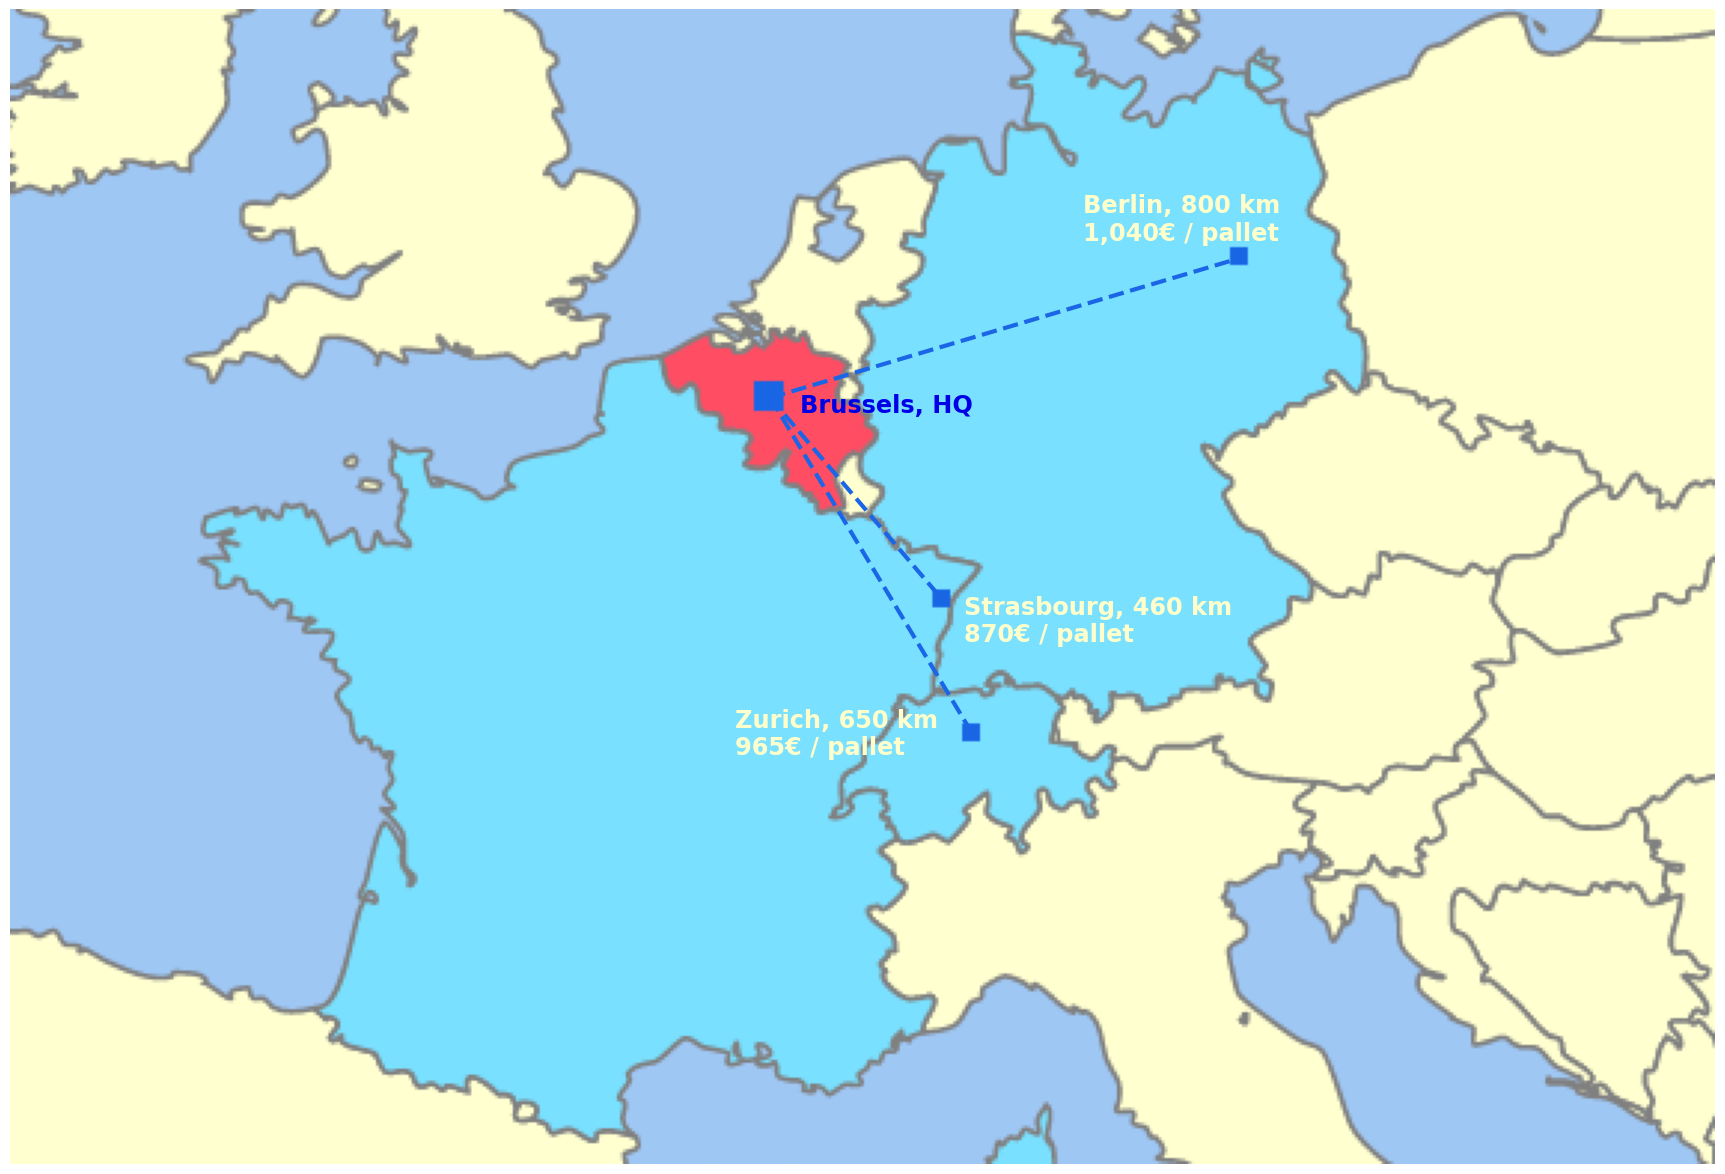

In [9]:
plt.figure(figsize=(22, 15))

ls  = '--' ; lw = 3

plt.plot([255, 313], [130, 198], linestyle=ls, color=celtic_blue, linewidth=lw)
plt.plot([255, 323], [130, 243], linestyle=ls, color=celtic_blue, linewidth=lw)
plt.plot([255, 413],  [130, 83], linestyle=ls, color=celtic_blue, linewidth=lw)

fw = 'black' ; fs = 'xx-large' ; cream = (1, 1, .8)

plt.text(265, 135, 'Brussels, HQ', fontweight=fw, fontsize=fs, color=(0, 0, .9))
plt.text(320, 212, 'Strasbourg, 460 km\n870€ / pallet',
         fontweight=fw, fontsize=fs, color=cream)
plt.text(243, 250, 'Zurich, 650 km\n965€ / pallet',
         fontweight=fw, fontsize=fs, color=cream)
plt.text(360,  77, 'Berlin, 800 km\n1,040€ / pallet',
         fontweight=fw, fontsize=fs, color=cream)

# Supprimons les axes pour faire joli
plt.axis('off')

# Savourons le rendu final
plt.imshow(image)

# Enregistrons notre chef-d'œuvre
plt.savefig('Expansion.png')

# Showons !?
plt.show()

Voilà, mon image est prête à être rajoutée à la question 1 du 3e exercice de notre devoir de groupe, j'espère d'ailleurs qu'on sera bien notés, et que de ton côté tu donnerais également une bonne note à ce petit tuto. Je suis entièrement disposé à répondre aux différentes questions que tu pourrais te poser à propos. Sur ce, bonne chance pour la suite et rendez-vous la prochaine fois qu'un devoir m'inspirera autant !